# PHYS270 Assigmment 11: Stiff ODE
Student name: Begantsova Milana

---
##Abstract
In this programming assignment, we are going to study Stiff differential equations for which numerical methods may provide unstable result. We will study the correlation between stability of the algorithm and correctly chosen stepsize based on Explicit Euler method. Then I will implement an Implicit Euler method that perfoms much better with Stiff ODE than Explicit method. I will identify three different and meaningful step-sizes to compare perfomance of Explicit and Implicit methods. According to the results of this experiment, Explicit Euler method requires much less stepsize to provide a stable solution. But as stepsize continues to decrease after some critical value both Explicit and Implicit methods perform similarly.

---
##Introduction
We call differential equation to be stiff if it contains some leading terms that make solution to variate rapidly. For example, look at Figure 1 and notice how rapidly $y$ changes in the first second and then it behaves in similar manner:
<center>
<img src="https://www.researchgate.net/profile/Hermann-Riecke/publication/346601306/figure/fig1/AS:964666901667840@1607005920679/Example-of-the-evolution-in-a-stiff-problem-after-a-fast-initial-transient-the-system.png" height=400>
<p>Figure 1 – Stiff solution to ODE</p>
</center>

If we try to approximate the solution to such ODE using numerical methods, we may fail to choose the stepsize $h$ correctly. It is better to use very small stepsize especially in the stiffness region for such methods as Explicit Euler method:
$$f(t,y)=\frac{dy}{dt}$$
$$y_i=y_{i-1}+f(t_{i-1},y_{i-1})h, \quad 1<=i<n, \quad h=\frac{(t_f-t_0)}{n}$$

Small stepsize assumes that we will have $(t_f-t_0)/h$ intervals and function evaluations, which means that compuational cost will rise. But there is one more option. Instead of approximating the solution explicitly, we can use Implicit Euler method, which uses next formula:
$$y_i=y_{i-1}+f(t_{i},y_{i})h$$
Depending on differential equation this formula will undergo some simplifications.
In the methods section, I will discuss in detail what are the limitations on h for our particular differential equation and what behaviour we may expect for different values of h.
Then I will implement both Explicit and Implicit Euler methods. By brute force approach I will identify the critical stepsize required for both methods to achief root mean square deviation error of $\varepsilon\approx 0.001$. I will also choose two other different values of $h$ that will informatively describe how the stability corelate with stepsize and number $n$. We will be able to graphically look at those solutions.

---
##Methods
Our goal is to solve the next differential equation:
$$y'= f(t,y)=-a(y-\sin t) + \cos t \quad(1), \quad \quad y(0)=1, a = 1000, \quad t\in[0,1]$$
If we look at this function $f$ more carefully we will notice that it has next term $-ay$ which will lead to exponential term in our solution. Exponential term at the beginning will lead to rapid variation, but with time its contribution will end up. So, our ODE is Stiff. We can identify the interval of stiffness if we conduct some priliminary analysis.

It is possible that our solution will have next exponential term: $e^{-at}$. Since this is rapidly decreasing function its contribution will be maximum at $t=0$. Once $e^{-at}<\frac{1}{a}$ its contribution will be minimum.
$$e^{-at}<\frac{1}{a}$$
$$0<t<-\frac{1}{a}ln\left(\frac{1}{a}\right)$$


In [ ]:
import numpy as np
a = 1000
b=-np.log(1/a)/a
b

0.006907755278982137

So, I may assume that the interval of Stiffness is $t\in[0, 0.006907]$. At this interval with Explicit Euler method we should be accurate with chosing the stepsize.

Lets identify what values of stepsize will provide more or less stable solutions. The formula for Explicit Euler method [1]:

$$y_i=y_{i-1}+f(t_{i-1},y_{i-1})h\quad(2)$$

$$y_i = y_{i-1}(1-ah)+(a\sin t_{i-1}+\cos t_{i-1})h \quad$$ 

If we write for $y_1$, $y_2$, we will notice the leading coefficient $(1-ah)^i$:
$$y_1=y_0(1-ah)+(a\sin t_0+\cos t_0)h$$
$$y_2=y_0(1-ah)^2+\big(a\sin t_0+\cos t_0\big)(1-ah)h+(a\sin t_1+\cos t_1)h$$


To end up with stable solution, we would like this leading term to approach 0 as $i\to\infty$, so we need:
$$|1-ah|<1$$
So for Explicit Euler method, we should have next limitation on $h$:
$$0<h<\frac{2}{a}=0.002$$
If we choose $h$ greater than this value than our solution may fail to converge at all. If choose values close to $0.002$ our solution may oscillate.

Or instead of choosing small values for h and increasing the computational cost, we can use Implicit Euler Method [1]:
$$y_i=y_{i-1}+f(t_{i},y_{i})h$$
$$y_i=y_{i-1}+(-a(y_i-\sin t_i) + \cos t_i)h$$
$$y_i=\frac{y_{i-1}+(a\sin t_i+\cos t_i)h}{1+ah} \quad (3)$$
If we substitute for $y_1$ and $y_2$:
$$y_1=y_0(1+ah)^{-1}+(a\sin t_1+\cos t_1)(1+ah)^{-1}h$$
$$y_2=y_0(1+ah)^{-2}+(a\sin t_1+\cos t_1)(1+ah)^{-2}h+(a\sin t_2+\cos t_2)(1+ah)^{-1}h$$
To end up with stable solution, we would like this leading term to approach 0 as  $i\to\infty$ , so we need:
$$|1+ah|>1$$
Since, $a=1000$ and $h>0$. Implicit Euler method will provide stable (stability does not assume acuracy) solution with any stepsize.
In the experiment section, I will use formulas(2) and (3) to implement both methods. Then with brute force method I will identify $h$ required to achief $\varepsilon<0.001$. I will calculate the acuracy of solution based on root mean square error:
$$\varepsilon=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(measured-theory)^2}$$
This formula will be useful as we deal with bunch of data points. I will find theoretical values by solving ODE analytically.

I will start checking the perfomance of Explicit and Implicit Euler methods with $h=0.1$ and gradually I will devide it by 2. I will pay special attention to the maximum $h_{max}=0.1$, to $h_{crit}$ where $\varepsilon<0.001$ and to boundary limiting value of $h<\approx0.002$. Their perfomance will be judged based on graphical similarity with analytical solution and rms error.


---
##Experiment

Before conducting the experiment, we should find analytical solution to given differential equation (see Methods).

###Analytical solution
$$y'+ay=a \ sin(t)+cos(t)$$
$$\mu(t)=e^{at}$$
$$e^{at}y=\int{e^{at}\left(a \ sin(t)+cos(t)\ \right)dt}$$
General solution:
$$y=sin(t)+Ce^{-at}$$
Initial conditions:
$$y(0)=1$$
Solution to ODE:
$$y= sin(t)+e^{-at}$$
Substitute for $a$ to get final solution:
$$y=sin(t)+e^{-1000t}$$

In [ ]:
#import all needed libaries
import matplotlib.pyplot as plt
import matplotlib

#set needed fonr size for graphs
font = {'size' : 14}
matplotlib.rc('font', **font)

Write a function for analytical solution:

In [ ]:
def analytical_solution(t, a = 1000):
  return np.sin(t)+np.exp(-a*t)

At first, I would like to look at the graph of analytical solution and see if my hypothesis about interval of stiffness was correct or not. 

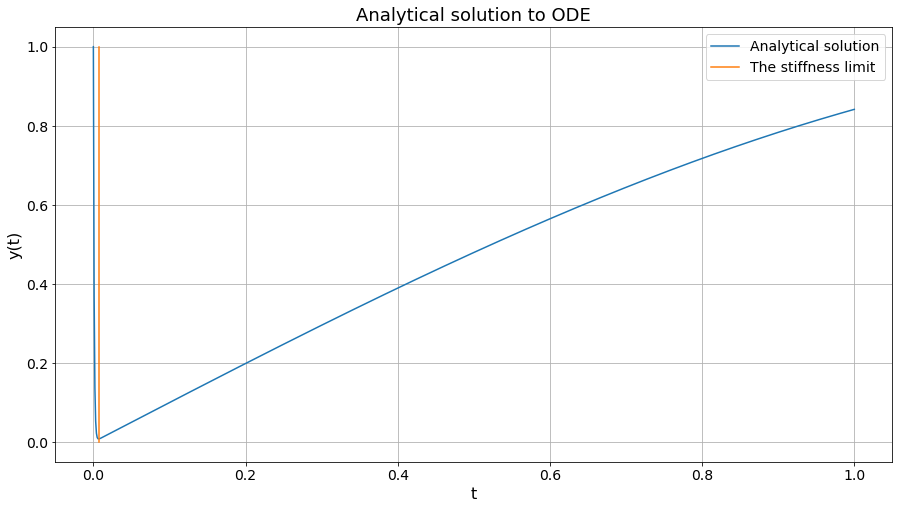

In [ ]:
#generate data for graph
theory_t = np.linspace(0, 1, 1000)
theory_y = analytical_solution(theory_t)

#graph settings
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Analytical solution to ODE", fontsize=18)
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("y(t)", fontsize=16)

#plot graphs
ax.plot(theory_t, theory_y,label="Analytical solution")
ax.plot(np.array([b]*10), np.linspace(0,1, 10),label="The stiffness limit")

ax.legend()
plt.grid()
plt.show()

It seems for me that the interval of stiffness was identified more or less correctly.
According to Methods section, I will judge the accuracy by rms formula:

In [ ]:
#function to compute rms deviation
def rms_error(theory, measured):
  return np.sqrt(np.mean((theory-measured)**2))


By problem definition, we are given next initial data. We should identify solution $t\in[0,1]$ and $y(0)=1$. We should identify solution with $\varepsilon<0.001$:

In [ ]:
#initial data
t_i = 0
t_f = 1
y_0 = 1
eps = 0.001

###Explicit Euler method

The formula for Explicit Euler method was discussed in detail in Methods section:

$$y_i=y_{i-1}+f(t_{i-1},y_{i-1})h\quad(2)$$


In [ ]:
#See formula(1)
f = lambda y, t: -a*(y-np.sin(t))+np.cos(t)

In [ ]:
#f - function, t - numpy array t in [0, 1], y_0 – y(0) innitial value, h – stepsize 
def euler_explicit(f, t, y_0, h):
  y = np.zeros(len(t))
  y[0] = y_0
  for i in range(1, len(t)):
    #See formula(2)
    y[i] = y[i-1] + h * f(y[i-1], t[i-1])
  return y


As it was stated in the Methods section, I will start checking the stability from $h=0.1$ and the continue gradually decreasing it by factor of 2:

In [ ]:
max_h = np.float128(0.1)
lim_h = np.float128(0.0018) # I would like to know how solution will begave near limiting value of h
min_h = max_h/pow(2, 16)

In [ ]:
def find_parameter(method, func, t_i, t_f, y_0, min_h, max_h,):
  #variables needed to identify critical h for which eps<=0.001
  crit_error = 1e18
  crit_h = max_h
  h = max_h
  find_crit = False

  while h>=min_h:
    #generate experimental and theoretical data
    t = np.linspace(t_i, t_f, round((t_f-t_i)/h), dtype = np.float128)
    measured = method(func, t, y_0, h)
    theory = analytical_solution(t)
   
    #estimate rms error
    err = rms_error(theory, measured)

    #find value of critical h
    if(err <= eps and not find_crit):
      crit_h = h
      crit_error = err
      find_crit = True
    #logging
    print(f"h: {h}, rms_error: {err}, n: {len(t)}")
    h/=2
  
  print(f"\nCritical value of h = {crit_h}. It requires {(t_f-t_i)/crit_h} function\nevaluations to get the rms error of {crit_error}<={eps}")
  return crit_error, crit_h

In [ ]:
# function finds such h that rms error < epsilon
explicit_crit_error, explicit_crit_h = find_parameter(euler_explicit, f, t_i, t_f, y_0, min_h, max_h,)

h: 0.1, rms_error: 2.889257177092338e+17, n: 10
h: 0.05, rms_error: 2.906187571313223e+31, n: 20
h: 0.025, rms_error: 1.065606456578996e+53, n: 40
h: 0.0125, rms_error: 7.0022573358087e+82, n: 80
h: 0.00625, rms_error: 2.578082493746841e+113, n: 160
h: 0.003125, rms_error: 1.6954465533916528e+103, n: 320
h: 0.0015625, rms_error: 0.03351918851491551, n: 640
h: 0.00078125, rms_error: 0.008505691535726749, n: 1280
h: 0.000390625, rms_error: 0.0035236958449750113, n: 2560
h: 0.0001953125, rms_error: 0.0016388641222263676, n: 5120
h: 9.765625e-05, rms_error: 0.0007936540355475494, n: 10240
h: 4.8828125e-05, rms_error: 0.0003908889458805968, n: 20480
h: 2.44140625e-05, rms_error: 0.00019401697297761656, n: 40960
h: 1.220703125e-05, rms_error: 9.665837029211436e-05, n: 81920
h: 6.103515625e-06, rms_error: 4.824247864585811e-05, n: 163840
h: 3.0517578125e-06, rms_error: 2.4099664145003147e-05, n: 327680
h: 1.52587890625e-06, rms_error: 1.204445087385516e-05, n: 655360

Critical value of h = 9.

In [ ]:
time_critical = np.linspace(t_i, t_f, round((t_f-t_i)/explicit_crit_h))
time_explicit = %timeit -o euler_explicit(f, time_critical, y_0, explicit_crit_h)

10 loops, best of 5: 71.8 ms per loop


If look carefully while $h>0.002$ (which we identified as boundary) the solution is instable (if we judge by rms error). For $h<0.002$ the rms error gradually decreases. When $h = 9.7\cdot10^{-5}$ we reach $\varepsilon< 0.001$. Until now we cannot judge the behaviour of solution exactly. We will do it in Graph plotting section.

Generate data for future graphs:

In [ ]:
explicit_h = [max_h, lim_h, explicit_crit_h]
explicit_t = [np.linspace(t_i, t_f, round((t_f-t_i)/h)) for h in explicit_h]
explicit_y = [euler_explicit(f, t, y_0, h) for t, h in zip(explicit_t, explicit_h)]
explicit_label = [f"Explicit Euler method, rms={rms_error(y, analytical_solution(t))}" for y, t in zip(explicit_y, explicit_t)]

###Implicit Euler method
$$g(t) = a\sin(t)+cos(t)$$
$$y_i=\frac{y_{i-1}+g(t)h}{1+ah}$$



In [ ]:
g = lambda t: a*np.sin(t)+np.cos(t)

In [ ]:
#f - function, t - numpy array t in [0, 1], y_0 – y(0) innitial value, h – stepsize 
def euler_implicit(f, t, y_0, h, a=1000):
  y = np.zeros(len(t))
  y[0] = y_0
  for i in range(1, len(t)):
    #see formula (3)
    y[i] = (y[i-1] + h * f(t[i]))/(1+a*h)
  return y

In [ ]:
# function finds such h that rms error < epsilon
implicit_crit_error, implicit_crit_h = find_parameter(euler_implicit, g, t_i, t_f, y_0, min_h, max_h,)

h: 0.1, rms_error: 0.0030966158581160197, n: 10
h: 0.05, rms_error: 0.00437364371871549, n: 20
h: 0.025, rms_error: 0.006081772093743829, n: 40
h: 0.0125, rms_error: 0.008302778331122987, n: 80
h: 0.00625, rms_error: 0.010863786002245161, n: 160
h: 0.003125, rms_error: 0.011593944879725862, n: 320
h: 0.0015625, rms_error: 0.008630436110677101, n: 640
h: 0.00078125, rms_error: 0.0051301512174345655, n: 1280
h: 0.000390625, rms_error: 0.0027973518912292714, n: 2560
h: 0.0001953125, rms_error: 0.0014669335925401828, n: 5120
h: 9.765625e-05, rms_error: 0.0007526173183458789, n: 10240
h: 4.8828125e-05, rms_error: 0.0003814248649465413, n: 20480
h: 2.44140625e-05, rms_error: 0.00019203740546253246, n: 40960
h: 1.220703125e-05, rms_error: 9.63560097966946e-05, n: 81920
h: 6.103515625e-06, rms_error: 4.826311053464748e-05, n: 163840
h: 3.0517578125e-06, rms_error: 2.415293036215323e-05, n: 327680
h: 1.52587890625e-06, rms_error: 1.2081821374145304e-05, n: 655360

Critical value of h = 9.765625

In [ ]:
time_implicit = %timeit -o euler_implicit(g, time_critical, y_0, implicit_crit_h)

10 loops, best of 5: 75.9 ms per loop


Though we started from $h=0.1$, Implicit Euler method still provided a stable result. But for some reason rms error continued to increase until reached $h<0.002$. I haven't succeded in explaining this phenomena. Because of this fact both Explicit and Implicit Euler methods converged to needed $\varepsilon$ with the same $h$. Though the critical $h$ in Euler Implicit method can be smaller than in Explicit Euler method. The step in increasing $h$ given by task definition does not allow to identify $h$ precicely.

Generate data for future graphs:

In [ ]:
implicit_y = [euler_implicit(g, t, y_0, h) for t, h in zip(explicit_t, explicit_h)]
implicit_label = [f"Implicit Euler method, rms={rms_error(y, analytical_solution(t))}" for y, t in zip(implicit_y, explicit_t)]

###Graph plotting

By comparing values of rms error with the same stepsizes, we identified that Implicit Euler method provides stable solutions to our ODE even with "big" values of $h$. Now it is time to confirm our hypothesis about behaviour of solutions of Euler Explicit method at different stepsizes. I remind you that for $h$ bigger than some limiting value ($h>0.002$) the solution may fail to converge. For values of $h$ close enough to limiting value, the solution may oscillate near the exact answer. For critical value of $h$ and smaller than this $h$, it should provide acurate solutions. To see this behaviour, I need to draw three plots with different step sizes: 

In [ ]:
def graph_solution(data):
  fig, ax = plt.subplots(3, 1, figsize=(15,25))
  i = 0
  for x, y, label, title in zip(data['explicit']['x'], data['explicit']['y'], data['explicit']['label'], data['sub_title']):
    ax[i].plot(data['theory']['x'], data['theory']['y'], "--", label=data['theory']['label'])
    ax[i].plot(x,y, "--", label=label)
    ax[i].set_title(title, fontsize=18)
    ax[i].set_xlabel("t",fontsize=16)
    ax[i].set_ylabel("y(t)",fontsize=16)
    i+=1
  i=0
  for x, y, label in zip(data['implicit']['x'], data['implicit']['y'], data['implicit']['label']):
    ax[i].set_yscale('log')
    ax[i].plot(x, y, "--", label=label)
    ax[i].legend()
    ax[i].grid()
    i+=1
  plt.show()

Store our data in a data structure:

In [ ]:
data = {
    'explicit': {
        'x' : explicit_t, 'y' : explicit_y, 'label' : explicit_label,
        },
    'implicit': {
        'x' : explicit_t, 'y' : implicit_y, 'label' : implicit_label 
        },
    'theory': {
        'x' : theory_t, 'y' : theory_y, 'label' : "Analytical Solution",
        },
    'sub_title':[f"Solution to ODE with step size = {h}" for h in explicit_h]
}

All the graph are drawn with y-scale set to logarithmic for visual purposes since with step size = 0.1 Explicit Euler method performs wildly:

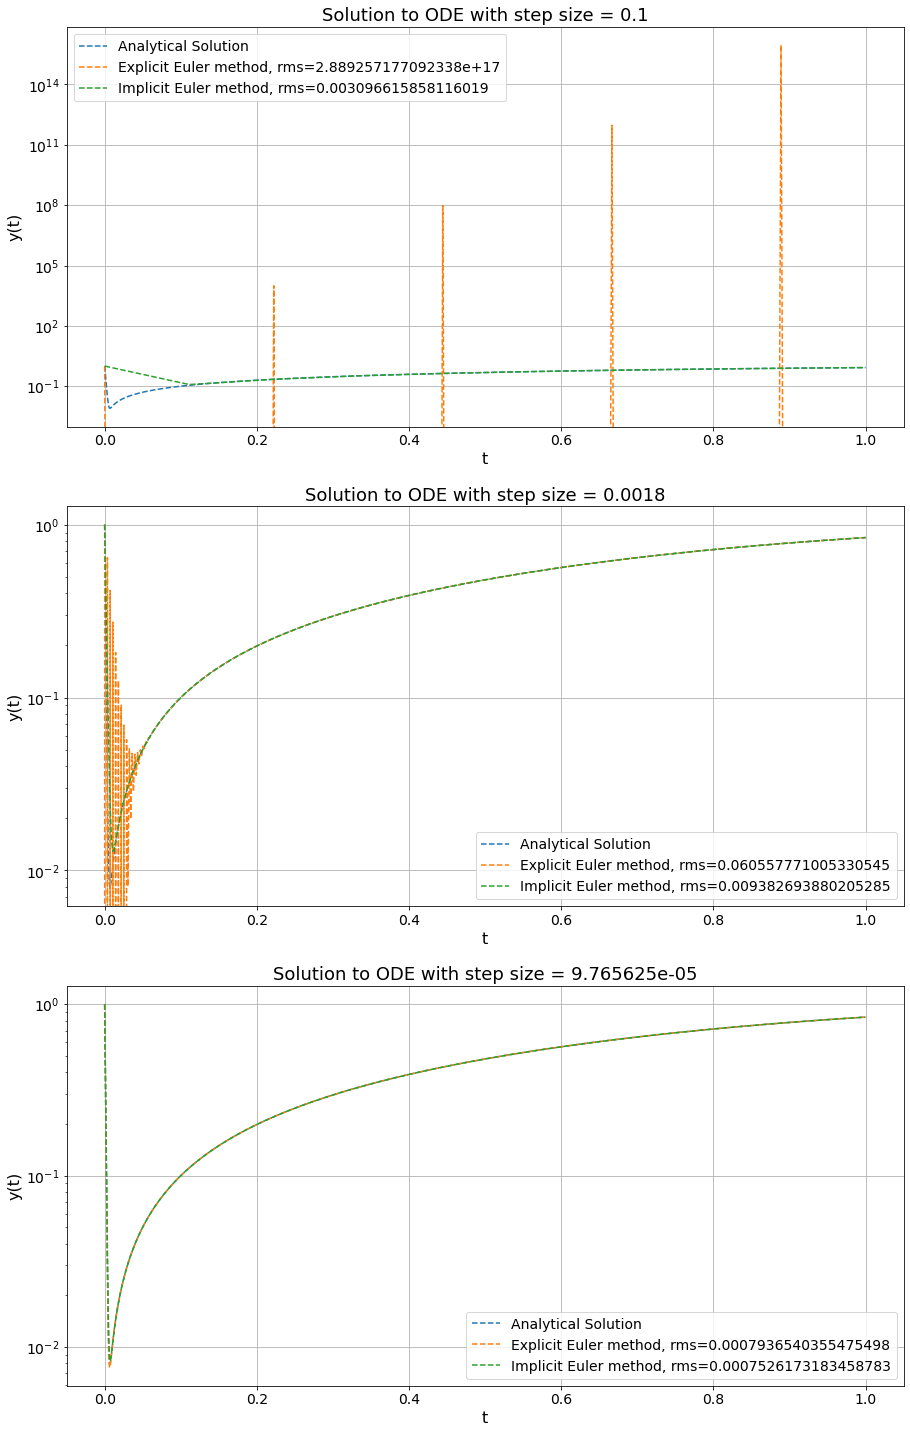

In [ ]:
graph_solution(data)
#Figure 2, 3, 4 – The solutions provided by Expliicit and Euler method for different step sizes 

If you look at Figure 2, Implicit Euler method in general performed well for $t\in[0.1, 1]$, but on the intervl $[0,0.1]$ there is a considereable deviation that appeared because we took only one point in this region. The Explicit Euler method with such "big" value of stepsize failed to converge at all which resulted in high root mean square error. With $h=0.0018$ close to limiting value, we see that the solution oscillates near exact answert in interval approximately $t\in[0,0.05]$ and after this interval solution stabilizes. For critical value of $h$ both methods performed well and approximated solution accurately copying the behaviour of analytical solution.

---
##Conclusion
In this programming assignment, we studied what are the stiff differential equations and what problems with stability can occur while differentiating them numerically. If we use Explicit methods of differentiation we may fail with getting stable solution because of choosing too "big" stepsizes. If we want to differentiate solutions that have region of stiffness, we should choose small enough stepsize that follows the limitations designated by ODE itself. This in turn will result in additional computational cost. Or instead of explicit differentiation we may use explicit one. For example, Euler Implicit differention. In theory, it should provide stable result even with "big" stepsize and should converge to required accuracy faster than explicit one. On practice we confirmed that Euler Implicit method provides stable solutions (see Figure 2-4), but for some reason it did not converged to required accuracy faster or this difference is inconsiderable with our ODE. Since they converged with the same $h$ the difference in computational cost was inconsiderable:

In [ ]:
print(f"The execution time of Explicit Euler method to get rms < 0.001 is {time_explicit.best*1000}ms,")
print(f"the execution time of Implicit Euler method is {time_implicit.best*1000}ms")

The execution time of Explicit Euler method to get rms < 0.001 is 71.83820949999813ms,
the execution time of Implicit Euler method is 75.87369750000335ms


So, for our particular ODE the only difference between Explicit Euler and Implicit Euler methods is stability of provided solution: implicit euler method does not require us to do preliminary analysis and define limiting values of $h$. Implicit Euler method depending on ODE may require additional computational cost but it is justified if we try to numerically differentiate Stiff ODE.

In the future it would be nice if we compare perfomance of Explicit Midpoint method and Implicit one with Euler. And see if there is any difference in behaviour of approximated solution. It could be the case that Explicit Midpoint method will have greater limiting value and computationally more efficient.

##Links
[1] Computational Physics Lecture 24, Implicit Euler Method and Stiff ODEs. Retrieved from:https://www.youtube.com/watch?v=ZL97OhSi6UM&t=515s